In [1]:
import pandas as pd
from instagramy import InstagramUser

### Informações do usuário

In [2]:
user = InstagramUser("geeks_for_geeks")

In [3]:
user.number_of_followings

3

In [4]:
user.number_of_followers

252025

Postagens recentes do usuário:

In [5]:
rows = []
posts = user.posts
for post in posts:
    rows.append(dict(likes=post.likes, comments=post.comments, post_url=post.post_url))
pd.DataFrame(rows)

,likes,comments,post_url
0,586,8,https://www.instagram.com/p/ChgzD4Ao_VR/
1,610,4,https://www.instagram.com/p/ChE7OCJoThU/
2,787,3,https://www.instagram.com/p/CjFk-FMrUNN/
3,4410,29,https://www.instagram.com/p/CjDAv2WL5T2/
4,2375,6,https://www.instagram.com/p/CjAcKbpo456/
5,5075,23,https://www.instagram.com/p/Ci9Xkfzo9wA/
6,5536,38,https://www.instagram.com/p/Ci7KQxXOCkg/
7,293,2,https://www.instagram.com/p/Ci4gTFdLIil/
8,1218,8,https://www.instagram.com/p/Ci2I_p3sZvR/
9,1514,11,https://www.instagram.com/p/CizjZYRs9Y3/


Informações disponíveis sobre o post

In [6]:
post

Post(likes=4278, comments=9, caption=None, is_video=False, timestamp=1663669834, location=None, shortcode='CiuanWsI1yl', post_url='https://www.instagram.com/p/CiuanWsI1yl/', display_url='https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/307693182_888861372075988_1302758098012177009_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=xTXnSIx6d-AAX_dyBX1&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT88AiBCc9tKsNN58puMsDtzoFXhIq7LvjrJTIMutJajGA&oe=633E2F50&_nc_sid=7bff83', post_source='https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/307693182_888861372075988_1302758098012177009_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=xTXnSIx6d-AAX_dyBX1&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT88AiBCc9tKsNN58puMsDtzoFXhIq7LvjrJTIMutJajGA&oe=633E2F50&_nc_sid=7bff83', taken_at_timestamp=datetime.datetime(2022, 9, 20, 7, 30, 34))

In [7]:
post.post_source

'https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/307693182_888861372075988_1302758098012177009_n.jpg?stp=dst-jpg_e35&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=104&_nc_ohc=xTXnSIx6d-AAX_dyBX1&edm=ABfd0MgBAAAA&ccb=7-5&oh=00_AT88AiBCc9tKsNN58puMsDtzoFXhIq7LvjrJTIMutJajGA&oe=633E2F50&_nc_sid=7bff83'

### Monitorando uma hashtag

In [8]:
from datetime import datetime
from instagramy import InstagramHashTag

In [9]:
tag = InstagramHashTag('fundoquantitativo')

In [10]:
tag.number_of_posts

161

Postagens mais recentes usando a hashtag

In [11]:
data = tag.tag_data

In [12]:
posts = []
for post in data['edge_hashtag_to_media']['edges']:
    text = post['node']['edge_media_to_caption']['edges'][0]['node']['text']
    shortcode = post['node']['shortcode']
    likes = post['node']['edge_liked_by']['count']
    comments = post['node']['edge_media_to_comment']['count']
    timestamp = post['node']['taken_at_timestamp']
    date = datetime.fromtimestamp(timestamp)
    video_view = 0
    if 'video_view_count' in post['node']:
        video_view = post['node']['video_view_count']
    posts.append(dict(text=text, shortcode=shortcode, likes=likes, 
                      comments=comments, date=date, video_view=video_view))
posts_df = pd.DataFrame(posts)

In [18]:
posts_df.sort_values('comments', ascending=False)

,text,shortcode,likes,comments,date,video_view
33,A(mar)!\n\nFim de ano chegando é época de esta...,CX0-9QrLouv,315,34,2021-12-23 10:58:10,0
3,Work 📊📝\n\n#investimentos #tecnologia #fundoqu...,Cftt59PuOUs,213,17,2022-07-07 11:25:38,0
20,Vídeo novo no canal Giant Steps no Youtube! \n...,Ca22qsfOdJG,112,4,2022-03-08 18:00:08,15989
19,“O jeito mais difícil de ganhar dinheiro fácil...,Ca8R0BaghE3,21,3,2022-03-10 20:31:48,0
24,Você conhece o canal Giant Steps do Youtube? \...,CaX5Ew8PlKZ,131,3,2022-02-24 18:00:00,6448
15,Vídeo novo no Youtube! 📱\n\nEste é o primeiro ...,CbP81ZvvGuM,69,3,2022-03-18 11:59:57,1180
2,"Conteúdo rico em conhecimento, aproveitem.\n\n...",CgI5la5AW8I,47,2,2022-07-18 00:48:30,456
23,Se você pensa que pode ganhar a vida como dayt...,Caawrg4LxjX,15,2,2022-02-25 20:07:21,0
32,Confira o nosso report semanal - 03 de janeiro...,CYUgYKoOiCb,7,0,2022-01-04 16:46:40,0
31,Confira o nosso report semanal - 10 de janeiro...,CYkHdywuVSo,4,0,2022-01-10 18:16:49,0


Informações disponíveis sobre a postagem

In [15]:
data['edge_hashtag_to_media']['edges'][0]['node']

{'comments_disabled': False,
 '__typename': 'GraphImage',
 'id': '2901724089129100806',
 'edge_media_to_caption': {'edges': [{'node': {'text': 'Atenção, #TRAD3\nO TC Traders Club informou agora que assinou um MOU que contempla o investimento de R$ 15 milhões para a aquisição da Pandhora Investimentos.\nA Pandhora é uma gestora de fundos multiestratégia quantitativos e possui um AuM de aproximadamente R$ 350 milhões.\n\n#tc #tradersclub #pandhora #fundos #fundoquantitativo #mltiestrategia #mou #aum #aquisicao #smallcap #smallcaps #portalsmallcaps #acoes #mercadofinanceiro #bolsadevalores'}}]},
 'shortcode': 'ChE_q9gu-YG',
 'edge_media_to_comment': {'count': 0},
 'taken_at_timestamp': 1660132488,
 'dimensions': {'height': 612, 'width': 612},
 'display_url': 'https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/298316889_332902455638624_2882334611550398418_n.jpg?stp=dst-jpg_e15&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=8cFLwQd1T-4AX975S8u&edm=ABZsPhsBAAAA&ccb=7-5&oh=00

In [16]:
data

{'id': '17973957049120546',
 'name': 'fundoquantitativo',
 'allow_following': False,
 'is_following': False,
 'is_top_media_only': False,
 'profile_pic_url': 'https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-15/240947280_198464575610893_8088619438936513946_n.jpg?stp=dst-jpg_e35_s150x150&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=101&_nc_ohc=tf-284r3vBQAX-KFlYk&edm=ABZsPhsBAAAA&ccb=7-5&oh=00_AT_NtWZOPd94iEt-14W1eCfDKU-R25iZTMfN_OHhCsZLNA&oe=633E9293&_nc_sid=4efc9f',
 'edge_hashtag_to_media': {'count': 161,
  'page_info': {'has_next_page': True,
   'end_cursor': 'QVFCbVQ2N01LcHlWR3NjMGM2aENmMXY2U3hwaW85aDNoZlFVY0xyVFRyOGZJNnAxWHpFU2dIa3pfZjdodS1YR1FZalRuYkpUaGZUVlJwOVFiRE5mNkliaw=='},
  'edges': [{'node': {'comments_disabled': False,
     '__typename': 'GraphImage',
     'id': '2901724089129100806',
     'edge_media_to_caption': {'edges': [{'node': {'text': 'Atenção, #TRAD3\nO TC Traders Club informou agora que assinou um MOU que contempla o investimento de R$ 15 milhões para a a

Comentários de uma postagem

In [20]:
from instagramy import InstagramPost

In [22]:
post = InstagramPost('CX0-9QrLouv')

In [23]:
post.text

'A(mar)!\n\nFim de ano chegando é época de estar com a família, de renovar sua motivação.\n\nVocê estuda, trabalha, cuida da sua saúde e investe por uma motivação. \n\nA minha maior motivação é essa pequena pessoa da foto, em quem eu me seguro e que me equilibra.\n\nFeliz natal e boas festas!\n\n📸 @caiotporto \n\n#love #natal #anonovo #xpinvestimentos #xpinc #financaspessoais #investimentos #mercadofinanceiro\n#assessordeinvestimentos #rendapassiva\n#fundosimobiliarios #selic #cdi #copom\n#investimentointernacional #inflacao #criptoativos #criptomoedas #bitcoin #riskparity #smartbeta #fundo#fundodeinvestimento #fundoquantitativo #beach #praia'

In [24]:
post.author

'_mattospedro'

In [25]:
post_comments = post.post_data['edge_media_to_parent_comment']['edges']

In [26]:
comments = []
for comment in post_comments:
    text = comment['node']['text']
    username = comment['node']['owner']['username']
    timestamp = comment['node']['created_at']
    comments.append(dict(text=text, username=username, timestamp=timestamp))
comments = pd.DataFrame(comments)

In [27]:
comments

,text,username,timestamp
0,Send the pics @_glisten_of_world,barber_bara1,1640267912
1,ahhhh ❤️,juliamattos02,1640268147
2,Te amo!!! ♥️,isabellabbpl,1640268352
3,CASAL MEDINA LINDO 😍,dani_schor,1640268421
4,"Opa, saiu uma ondinha la trás heuheu",tiagolara__,1640268536
5,😍😍😍😍 que amor ❤️,clarasodree,1640268903
6,😍,talitarobles,1640269002
7,Ahhhh 😍😍😍,camilla.dolle,1640269027
8,Quem é o poeta agora? Lindos 😍,caiodcarvalho,1640270037
9,❤️❤️,sgavi.xp,1640270631


In [28]:
comment

{'node': {'id': '18018551431353879',
  'text': '❤️❤️❤️',
  'created_at': 1640466771,
  'did_report_as_spam': False,
  'owner': {'id': '205208804',
   'is_verified': False,
   'profile_pic_url': 'https://instagram.fsdu17-1.fna.fbcdn.net/v/t51.2885-19/50835110_601447866968182_7158385467841314816_n.jpg?stp=dst-jpg_s150x150&_nc_ht=instagram.fsdu17-1.fna.fbcdn.net&_nc_cat=110&_nc_ohc=tpfnkoCNO0UAX_48c4P&edm=AABBvjUBAAAA&ccb=7-5&oh=00_AT9XkxXSDBwfCkRmbIy1bGiTP5oM6h4RIVZq2-wwitRnkw&oe=633DB9BF&_nc_sid=83d603',
   'username': 'camimontenegro'},
  'viewer_has_liked': False,
  'edge_liked_by': {'count': 1},
  'is_restricted_pending': False,
  'edge_threaded_comments': {'count': 0,
   'page_info': {'has_next_page': False, 'end_cursor': None},
   'edges': []}}}

### Análise dos textos

In [29]:
import re
import string
from nltk import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [30]:
exclude = set(string.punctuation)
print(exclude)

{'~', '[', '#', ']', '$', '>', '^', '{', '|', '`', '-', '"', '@', '}', '(', '/', '&', ':', '+', "'", ')', '\\', '_', '*', '=', '.', ',', '!', ';', '<', '?', '%'}


In [31]:
all_posts = posts_df.text.apply(lambda x: x.lower().replace("\n", " "))
clean_posts = all_posts.apply(lambda post: re.sub("#([a-zA-Z0-9_áéóíàèãñõâêôç]+)", " ", post).strip())
clean_posts = clean_posts.apply(lambda post: re.sub("@([a-zA-Z0-9_áéóíàèãñõâêôç]+)", " ", post.lower()).strip())
clean_posts = clean_posts.apply(lambda post: ''.join(ch for ch in post if ch not in exclude))
clean_posts = clean_posts.apply(lambda post: remove_emojis(post))

In [32]:
clean_posts

0     atenção   o tc traders club informou agora que...
1     estaremos na expert xp entre 2 e 4 de agosto  ...
2     conteúdo rico em conhecimento aproveitem  aces...
3                                                 work 
4     hoje mais cedo estivemos no seminário de inves...
5     confira o nosso report semanal  23 de maio de ...
6     confira o nosso report semanal  16 de maio de ...
7     confira o nosso report semanal  09 de maio de ...
8     confira o nosso report semanal  02 de maio de ...
9     confira o nosso report semanal  25 de abril de...
10    confira o nosso report semanal  18 de abril de...
11    confira o nosso report semanal  11 de abril de...
12    confira o nosso report semanal  04 de abril de...
13    confira o nosso report semanal  28 de fevereir...
14    confira o nosso report semanal  21 de fevereir...
15    vídeo novo no youtube   este é o primeiro víde...
16    confira o nosso report semanal  14 de fevereir...
17    já vínhamos de um cenário difícil com a al

In [33]:
clean_posts_words = [' '.join([word for word in word_tokenize(text) if word not in stopwords.words('portuguese')]) for text in clean_posts]

In [34]:
clean_posts_words[:2]

['atenção tc traders club informou agora assinou mou contempla investimento r 15 milhões aquisição pandhora investimentos pandhora gestora fundos multiestratégia quantitativos possui aum aproximadamente r 350 milhões',
 'estaremos expert xp 2 4 agosto venha encontrar gestores conhecer sobre investimentos quantitativos estande b06']

In [35]:
all_text_newwords = ' '.join(clean_posts_words)

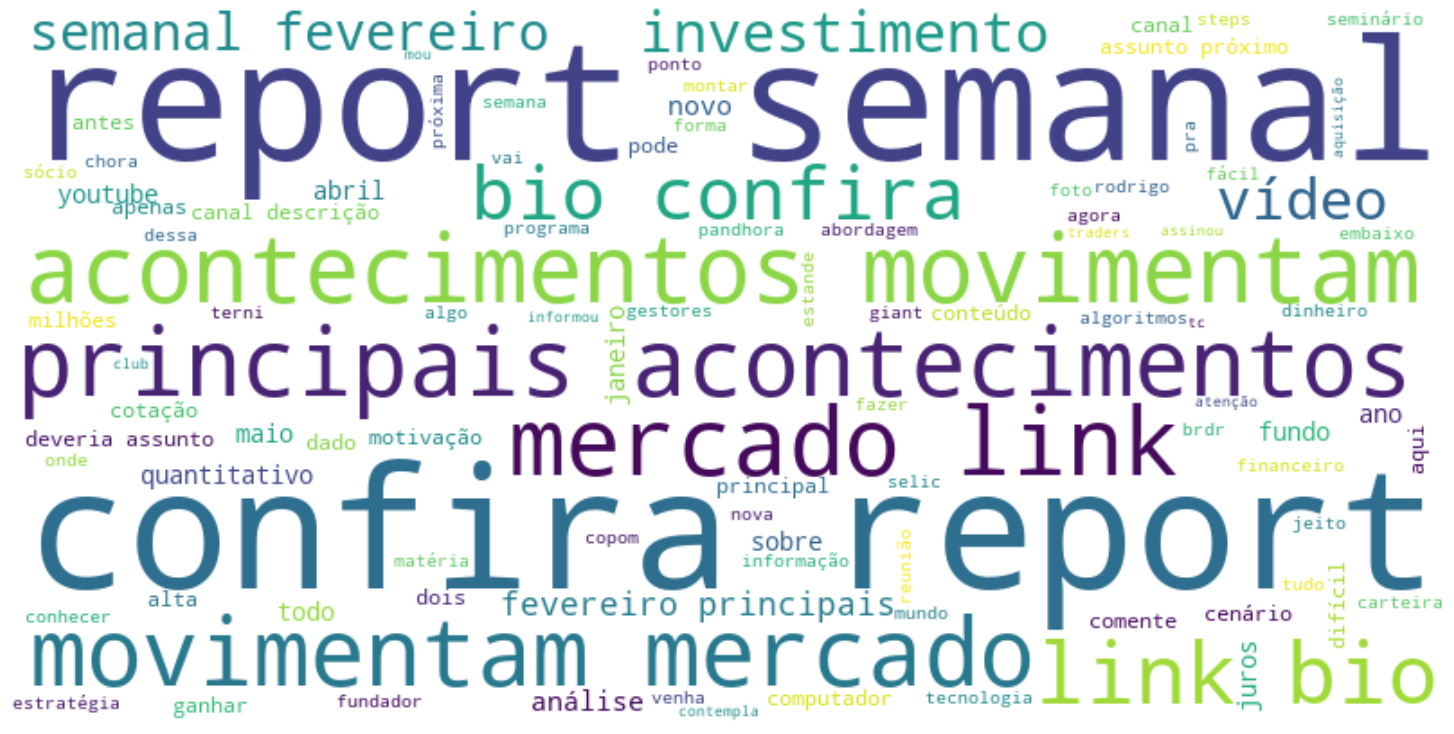

In [36]:
wc = WordCloud(background_color="white", width=800, height=400, max_words=100)
wc.generate(all_text_newwords)

plt.figure( figsize=(20,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

In [42]:
stop = stopwords.words('portuguese')

In [43]:
stop.extend(['sobre', 'vai', 'algo', 'onde', 'pode', 'aqui', 'link', 'bio'])

In [44]:
clean_posts_words = [' '.join([word for word in word_tokenize(text) if word not in stop]) for text in clean_posts]
all_text_newwords = ' '.join(clean_posts_words)

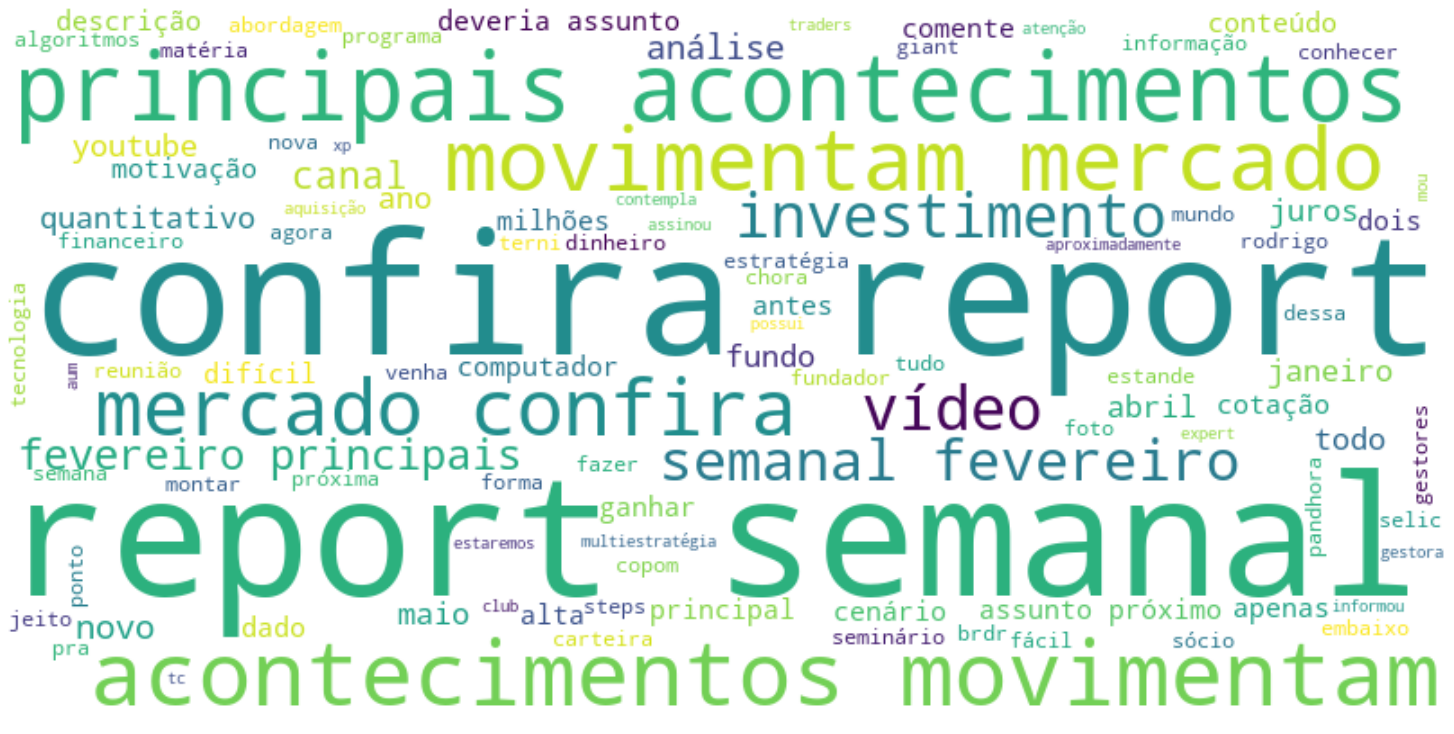

In [45]:
wc = WordCloud(background_color="white", width=800, height=400, max_words=100)
wc.generate(all_text_newwords)

plt.figure( figsize=(20,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.show()

In [46]:
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [47]:
most_common = Counter(word_tokenize(remove_emojis(all_text_newwords))).most_common(15)

In [48]:
most_common

[('mercado', 25),
 ('confira', 21),
 ('report', 20),
 ('semanal', 20),
 ('2022', 20),
 ('principais', 20),
 ('acontecimentos', 20),
 ('movimentam', 20),
 ('vídeo', 9),
 ('fevereiro', 8),
 ('investimentos', 7),
 ('canal', 6),
 ('youtube', 4),
 ('análise', 4),
 ('juros', 4)]

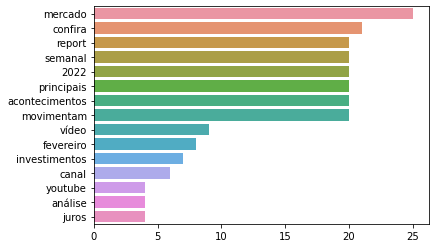

In [49]:
words, frequency = [], []
for word, count in most_common:
    words.append(word)
    frequency.append(count)
sns.barplot(x = frequency, y = words);

In [50]:
vec = CountVectorizer(stop_words= stop, ngram_range = (2, 2), min_df=2)
bow = vec.fit_transform(clean_posts_words)

count_values = bow.toarray().sum(axis=0)

ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

ngram_most_common = ngram_freq.head(15)

In [51]:
ngram_most_common

,frequency,ngram
0,20,report semanal
1,20,principais acontecimentos
2,20,movimentam mercado
3,20,confira report
4,20,acontecimentos movimentam
5,20,2022 principais
6,8,fevereiro 2022
7,4,maio 2022
8,4,janeiro 2022
9,4,abril 2022


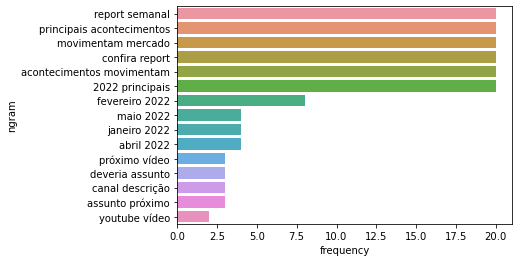

In [52]:
sns.barplot(x = ngram_most_common['frequency'], y = ngram_most_common['ngram']);

In [53]:
vec = TfidfVectorizer(stop_words= stop, ngram_range = (2, 2))
tf = vec.fit_transform(clean_posts_words)

count_values = tf.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

ngram_most_common = ngram_freq.head(10)

<AxesSubplot:xlabel='frequency', ylabel='ngram'>

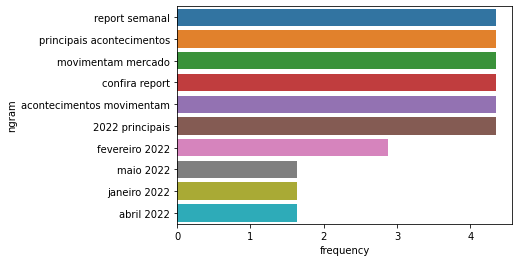

In [54]:
sns.barplot(x = ngram_most_common['frequency'], y = ngram_most_common['ngram'])